In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [39]:
def blk_scholes(S, K, T, r, voli, payoption):
   
    d1 = (np.log(S / K) + (r + 0.5 * voli ** 2) * T) / (voli * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * voli ** 2) * T) / (voli * np.sqrt(T))
    if payoption == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoption == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
       
    
    return option_value
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #voli: volatility of underlying asset
    #payoption: call or put
     

In [40]:
blk_scholes(200, 210, 1, 0.03, 0.25, 'call')

18.243598915448175

In [41]:
blk_scholes(200, 210, 1, 0.03, 0.25, 'put')

22.03716096063488

In [42]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = blk_scholes(S[i], 200, 1, 0.03, 0.25, 'call')
    Put [i] = blk_scholes(S[i], 200, 1, 0.03, 0.25, 'put')

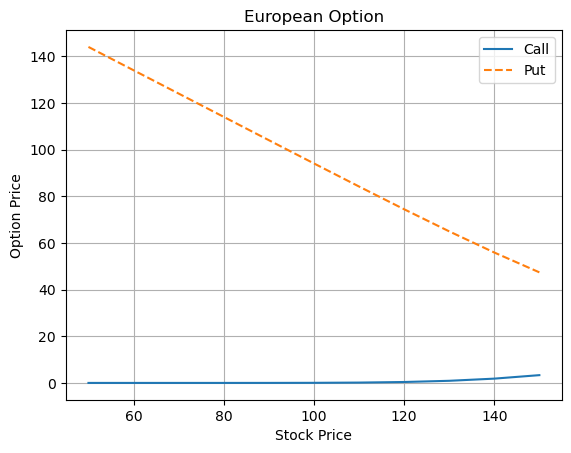

In [8]:
figr = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [43]:
def delta(S, K, T, r, vol, payoption):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoption == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoption == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [44]:
delta(300, 306, 1, 0.04, 0.25, 'call')

0.5815223246889747

In [45]:
delta(300, 306, 1, 0.04, 0.25, 'put')

-0.4184776753110253

In [48]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 300, 1, 0.04, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 300, 1, 0.04, 0.25, 'put')

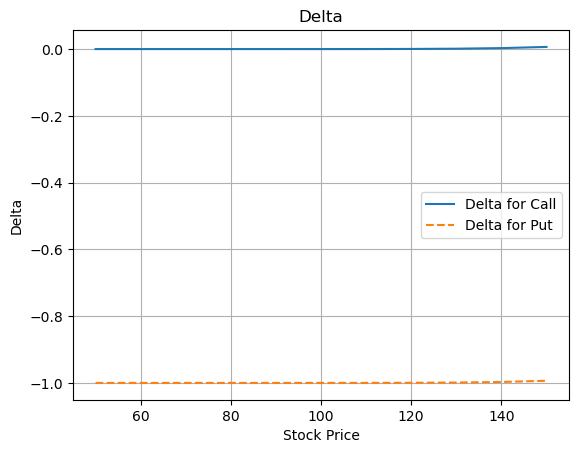

In [49]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [51]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 300, T[i], 0.03, 0.25, 'call')

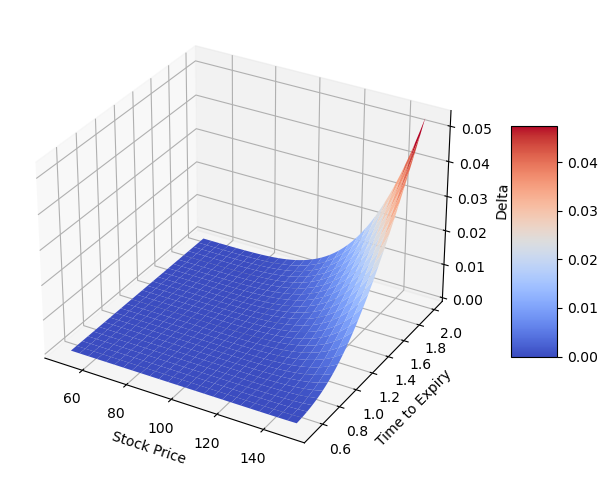

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [63]:
def gamma(S, K, T, r,  vol, payoption):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [64]:
gamma(300, 306, 1, 0.04, 0.25, 'call')

0.00520778163350201

In [65]:
gamma(300, 306, 1, 0.04, 0.25, 'put')

0.00520778163350201

In [66]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.25, 'call')

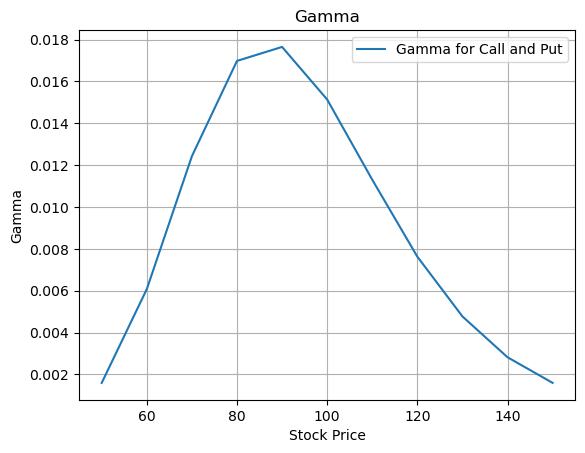

In [67]:
figr = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [70]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 300, T[i], 0.03, 0.25, 'call')

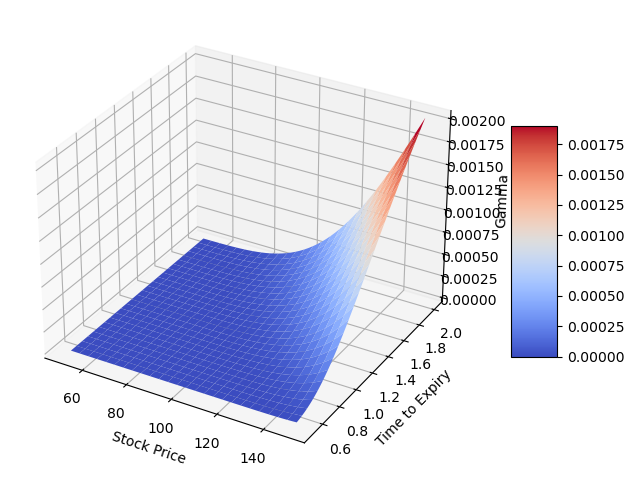

In [71]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [72]:
def theta(S, K, T, r, vol, payoption):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoption == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoption == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [73]:
theta(300, 306, 1, 0.04, 0.25, 'call')

-20.319567343857432

In [74]:
theta(300, 306, 1, 0.04, 0.25, 'put')

-8.559504608632995

In [75]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 0.05, 0.25, 'call')
    Theta_Put [i] = theta(100, 100, T[i], 0.05, 0.25, 'put')

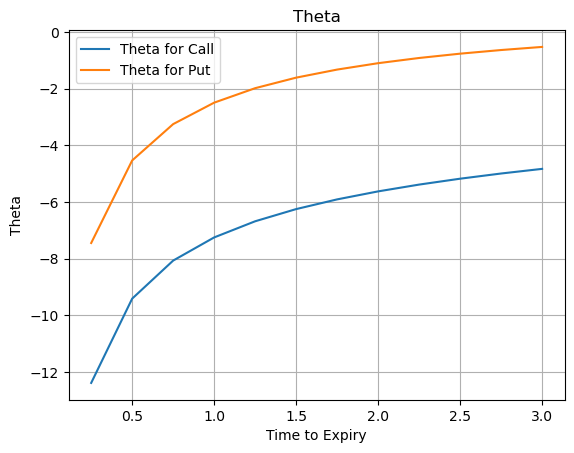

In [76]:
figr = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [77]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 300, T[i], 0.03, 0.25, 'call')

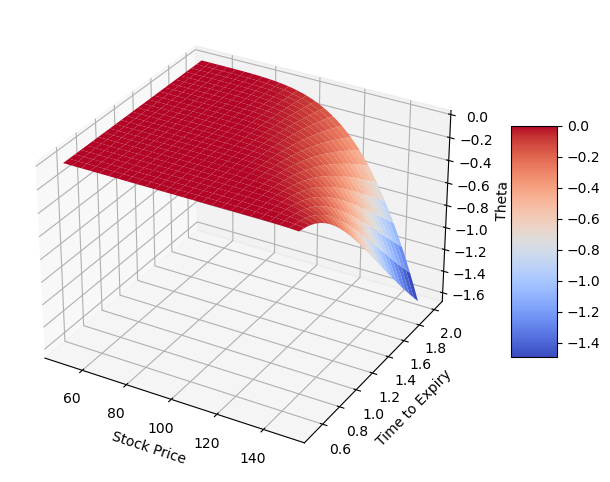

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [86]:
def rho(S, K, T, r, vol, payoption):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoption == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoption == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [87]:
rho(300, 306, 1, 0.04, 0.25, 'call')

141.8170374908257

In [88]:
rho(300, 306, 1, 0.04, 0.25, 'put')

-152.18453088978518

In [82]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 1, r[i], 0.25, 'call')
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.25, 'put')

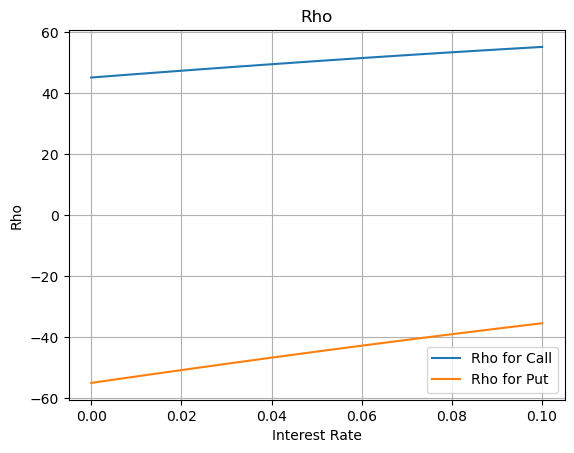

In [83]:
figr = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [84]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 300, T[i], 0.03, 0.25, 'call')

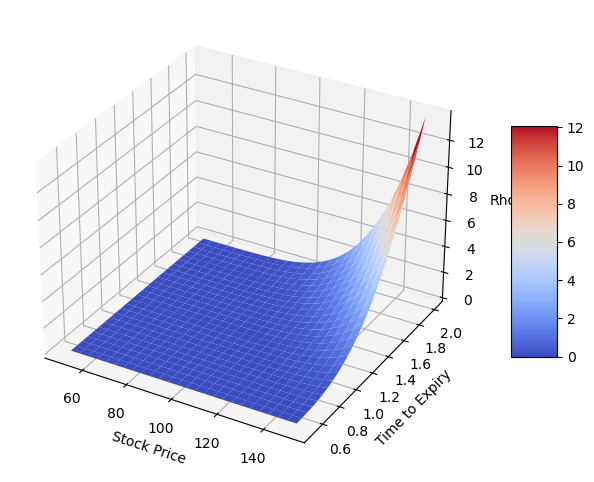

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);